# Assignment 4 for OpenMMLab Camp 2 2023
## MMSegmentation

By Yuming Liu @jercylew
Updated: 2023/6/16

# 0. Env setup


Keep using the drive disk, the data, config, and source are located in google drive, so mound the google drive each time run this notebook

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
# Now enter the workspace in google drive
import os
os.chdir('/content/drive/MyDrive/workspace')
!pwd

/content/drive/MyDrive/workspace


Install dependencies

In [87]:
# Upgrade numpy
# Trick for upgrading numpy, fuck ^_^
!pip install -U numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [88]:
# Pytorch
!pip install install torch torchvision torchaudio -f https://download.pytorch.org/whl/cu113/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html


In [89]:
# MMCV via MIM
!pip install -U openmim
!mim install mmengine
!mim install 'mmcv==2.0.0rc3'
!mim install "mmdet>=3.0.0rc6"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
  Using cached mmcv-2.0.0rc3-cp310-cp310-linux_x86_64.whl
  Attempting uninstall: mmcv
    Found existing installation: mmcv 2.0.0
    Uninstalling mmcv-2.0.0:
      Successfully uninstalled mmcv-2.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mmdet 3.0.0 requires mmcv<2.1.0,>=2.0.0rc4, but you have mmcv 2.0.0rc3 which is incompatible.
mmsegmentation 1.0.0 requires mmcv>=2.0.0rc4, but you have

In [90]:
# Other necessary packages
!pip install opencv-python pillow matplotlib seaborn tqdm pycocotools pytorch-lightning -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [91]:
# Environment check and display
from mmengine.utils import get_git_hash
from mmengine.utils.dl_utils import collect_env as collect_base_env

import mmdet

# 环境信息收集和打印
def collect_env():
    """Collect the information of the running environments."""
    env_info = collect_base_env()
    env_info['MMDetection'] = f'{mmdet.__version__}+{get_git_hash()[:7]}'
    return env_info


if __name__ == '__main__':
    for name, val in collect_env().items():
        print(f'{name}: {val}')

sys.platform: linux
Python: 3.10.12 (main, Jun  7 2023, 12:45:35) [GCC 9.4.0]
CUDA available: True
numpy_random_seed: 0
GPU 0: Tesla T4
CUDA_HOME: /usr/local/cuda
NVCC: Cuda compilation tools, release 11.8, V11.8.89
GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
PyTorch: 2.0.1+cu118
PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_75,code=sm_75;-gencode;arch=compute_80,code=sm_80;-gencode;a

# 1. Download MMSegmentation

In [ ]:
os.chdir('/content/drive/MyDrive/workspace')
!pwd
!git clone https://github.com/open-mmlab/mmsegmentation.git -b dev-1.x

/content/drive/MyDrive/workspace
Cloning into 'mmsegmentation'...
remote: Enumerating objects: 15132, done.
remote: Counting objects: 100% (699/699), done.
remote: Compressing objects: 100% (471/471), done.
remote: Total 15132 (delta 280), reused 431 (delta 196), pack-reused 14433
Receiving objects: 100% (15132/15132), 20.28 MiB | 17.84 MiB/s, done.
Resolving deltas: 100% (10589/10589), done.
Updating files: 100% (1461/1461), done.


In [92]:
import os
os.chdir('mmsegmentation')
!pwd

/content/drive/MyDrive/workspace/mmsegmentation


Create necessary directoreis to prepare for training models

In [ ]:
import os

os.mkdir('checkpoint')
os.mkdir('outputs')
os.mkdir('data')

# 2. Install MMSegmentation

In [93]:
!mim install -v -e .

Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
Obtaining file:///content/drive/MyDrive/workspace/mmsegmentation
  Running command python setup.py egg_info
  running egg_info
  creating /tmp/pip-pip-egg-info-egloc_24/mmsegmentation.egg-info
  writing /tmp/pip-pip-egg-info-egloc_24/mmsegmentation.egg-info/PKG-INFO
  writing dependency_links to /tmp/pip-pip-egg-info-egloc_24/mmsegmentation.egg-info/dependency_links.txt
  writing requirements to /tmp/pip-pip-egg-info-egloc_24/mmsegmentation.egg-info/requires.txt
  writing top-level names to /tmp/pip-pip-egg-info-egloc_24/mmsegmentation.egg-info/top_level.txt
  writing manifest file '/tmp/pip-pip-egg-info-egloc_24/mmsegmentation.egg-info/SOURCES.txt'
  reading manifest file '/tmp/pip-pip-egg-info-egloc_24/mmsegmentation.egg-i

# 3. Download necessary files



In [ ]:
# Download the pre-trained model checkpoint file
!wget https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth -P checkpoint

--2023-06-16 04:28:10--  https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.246.48.204, 47.246.48.209, 47.246.48.205, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|47.246.48.204|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 196205945 (187M) [application/octet-stream]
Saving to: ‘checkpoint/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth’

pspnet_r50-d8_512x1 100%[===================>] 187.12M  81.4MB/s    in 2.3s    

2023-06-16 04:28:13 (81.4 MB/s) - ‘checkpoint/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth’ saved [196205945/196205945]



In [ ]:
# Download the test files
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220713-mmdetection/images/street_uk.jpeg -P data

# Shanghai street
!wget https://zihao-download.obs.cn-east-3.myhuaweicloud.com/detectron2/traffic.mp4 -P data

# Another street
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220713-mmdetection/images/street_20220330_174028.mp4 -P data

--2023-06-16 04:28:35--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220713-mmdetection/images/street_uk.jpeg
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 469065 (458K) [image/jpeg]
Saving to: ‘data/street_uk.jpeg’

street_uk.jpeg      100%[===================>] 458.07K   465KB/s    in 1.0s    

2023-06-16 04:28:37 (465 KB/s) - ‘data/street_uk.jpeg’ saved [469065/469065]

--2023-06-16 04:28:37--  https://zihao-download.obs.cn-east-3.myhuaweicloud.com/detectron2/traffic.mp4
Resolving zihao-download.obs.cn-east-3.myhuaweicloud.com (zihao-download.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.163, 121.36.235.162
Connecting to zihao-download.obs.cn-east-3.myhuaweicloud.com (zihao-download.obs.cn-ea

# 4. Check the installation

In [94]:
import torch, torchvision
print('Pytorch 版本', torch.__version__)
print('CUDA 是否可用',torch.cuda.is_available())

Pytorch 版本 2.0.1+cu118
CUDA 是否可用 True


In [95]:
import mmcv
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print('MMCV版本', mmcv.__version__)
print('CUDA版本', get_compiling_cuda_version())
print('编译器版本', get_compiler_version())

MMCV版本 2.0.0
CUDA版本 11.8
编译器版本 GCC 9.3


In [96]:
import mmseg
from mmseg.utils import register_all_modules
from mmseg.apis import inference_model, init_model
print('mmsegmentation版本', mmseg.__version__)

mmsegmentation版本 1.0.0


# 5. Matplotlib Chinese support

In [97]:
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /content/drive/MyDrive/workspace/SimHei.ttf

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

fontManager.addfont('/content/drive/MyDrive/workspace/SimHei.ttf')
mpl.rc('font', family='SimHei')

!pwd

/content/drive/MyDrive/workspace/mmsegmentation


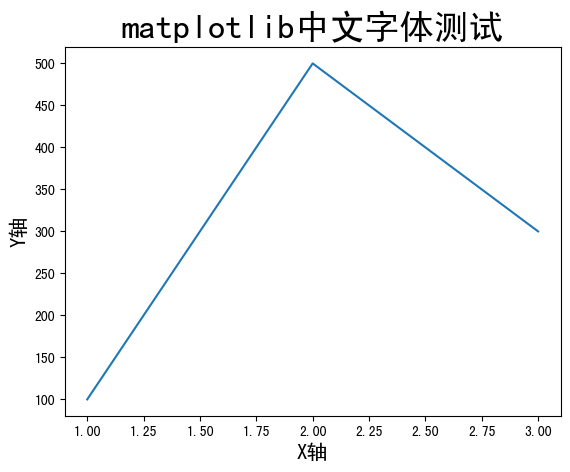

In [98]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

# 6.Test inference using pre-trained model

In [ ]:
os.chdir('/content/drive/MyDrive/workspace/mmsegmentation')
!pwd

/content/drive/MyDrive/workspace/mmsegmentation


In [ ]:
# Load the image
from PIL import Image
Image.open('data/street_uk.jpeg')

In [ ]:
# SegFormer
!python demo/image_demo.py \
        data/street_uk.jpeg \
        configs/pspnet/pspnet_r50-d8_4xb2-40k_cityscapes-512x1024.py \
        https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth \
        --out-file outputs/B1_uk_pspnet.jpg \
        --device cuda:0 \
        --opacity 0.5

In [ ]:
Image.open('outputs/B1_uk_pspnet.jpg')

In [ ]:
# SegFormer
!python demo/image_demo.py \
        data/street_uk.jpeg \
        configs/segformer/segformer_mit-b5_8xb1-160k_cityscapes-1024x1024.py \
        https://download.openmmlab.com/mmsegmentation/v0.5/segformer/segformer_mit-b5_8x1_1024x1024_160k_cityscapes/segformer_mit-b5_8x1_1024x1024_160k_cityscapes_20211206_072934-87a052ec.pth \
        --out-file outputs/B1_uk_segformer.jpg \
        --device cuda:0 \
        --opacity 0.5

In [ ]:
Image.open('outputs/B1_uk_segformer.jpg')


In [ ]:
!python demo/image_demo.py \
        data/street_uk.jpeg \
        configs/mask2former/mask2former_swin-l-in22k-384x384-pre_8xb2-90k_cityscapes-512x1024.py \
        https://download.openmmlab.com/mmsegmentation/v0.5/mask2former/mask2former_swin-l-in22k-384x384-pre_8xb2-90k_cityscapes-512x1024/mask2former_swin-l-in22k-384x384-pre_8xb2-90k_cityscapes-512x1024_20221202_141901-28ad20f1.pth \
        --out-file outputs/B1_uk_Mask2Former.jpg \
        --device cuda:0 \
        --opacity 0.5

In [ ]:
Image.open('outputs/B1_uk_Mask2Former.jpg')

In [ ]:
# ADE20K
!python demo/image_demo.py \
        data/street_uk.jpeg \
        configs/segformer/segformer_mit-b5_8xb2-160k_ade20k-640x640.py \
        https://download.openmmlab.com/mmsegmentation/v0.5/segformer/segformer_mit-b5_640x640_160k_ade20k/segformer_mit-b5_640x640_160k_ade20k_20220617_203542-940a6bd8.pth \
        --out-file outputs/B1_Segformer_ade20k.jpg \
        --device cuda:0 \
        --opacity 0.5

In [ ]:
Image.open('outputs/B1_Segformer_ade20k.jpg')

**Video segmentation**

In [ ]:
import numpy as np
import time
import shutil

import torch

from PIL import Image
import cv2

import mmcv
import mmengine
from mmseg.apis import inference_model
from mmseg.utils import register_all_modules
register_all_modules()

from mmseg.datasets import CityscapesDataset


In [ ]:
# 模型 config 配置文件
config_file = 'configs/mask2former/mask2former_swin-l-in22k-384x384-pre_8xb2-90k_cityscapes-512x1024.py'

# 模型 checkpoint 权重文件
checkpoint_file = 'https://download.openmmlab.com/mmsegmentation/v0.5/mask2former/mask2former_swin-l-in22k-384x384-pre_8xb2-90k_cityscapes-512x1024/mask2former_swin-l-in22k-384x384-pre_8xb2-90k_cityscapes-512x1024_20221202_141901-28ad20f1.pth'

from mmseg.apis import init_model
model = init_model(config_file, checkpoint_file, device='cuda:0')

from mmengine.model.utils import revert_sync_batchnorm
if not torch.cuda.is_available():
    model = revert_sync_batchnorm(model)

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmsegmentation/v0.5/mask2former/mask2former_swin-l-in22k-384x384-pre_8xb2-90k_cityscapes-512x1024/mask2former_swin-l-in22k-384x384-pre_8xb2-90k_cityscapes-512x1024_20221202_141901-28ad20f1.pth


In [ ]:
input_video = 'data/street_20220330_174028.mp4'
temp_out_dir = time.strftime('%Y%m%d%H%M%S')
os.mkdir(temp_out_dir)
print('创建临时文件夹 {} 用于存放每帧预测结果'.format(temp_out_dir))

创建临时文件夹 20230616053715 用于存放每帧预测结果


In [ ]:
# 获取 Cityscapes 街景数据集 类别名和调色板
from mmseg.datasets import cityscapes
classes = cityscapes.CityscapesDataset.METAINFO['classes']
palette = cityscapes.CityscapesDataset.METAINFO['palette']

In [ ]:
def pridict_single_frame(img, opacity=0.2):

    result = inference_model(model, img)

    # 将分割图按调色板染色
    seg_map = np.array(result.pred_sem_seg.data[0].detach().cpu().numpy()).astype('uint8')
    seg_img = Image.fromarray(seg_map).convert('P')
    seg_img.putpalette(np.array(palette, dtype=np.uint8))

    show_img = (np.array(seg_img.convert('RGB')))*(1-opacity) + img*opacity

    return show_img

In [ ]:
# 读入待预测视频
imgs = mmcv.VideoReader(input_video)

prog_bar = mmengine.ProgressBar(len(imgs))

# 对视频逐帧处理
for frame_id, img in enumerate(imgs):

    ## 处理单帧画面
    show_img = pridict_single_frame(img, opacity=0.15)
    temp_path = f'{temp_out_dir}/{frame_id:06d}.jpg' # 保存语义分割预测结果图像至临时文件夹
    cv2.imwrite(temp_path, show_img)

    prog_bar.update() # 更新进度条

# 把每一帧串成视频文件
mmcv.frames2video(temp_out_dir, 'outputs/B3_video.mp4', fps=imgs.fps, fourcc='mp4v')

shutil.rmtree(temp_out_dir) # 删除存放每帧画面的临时文件夹
print('删除临时文件夹', temp_out_dir)

[                                                  ] 0/159, elapsed: 0s, ETA:

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 138/138, 22.1 task/s, elapsed: 6s, ETA:     0s
删除临时文件夹 20230616053715


# 7. Download the dataset

In [ ]:
os.chdir('/content/drive/MyDrive/workspace/mmsegmentation/data')
!pwd

/content/drive/MyDrive/workspace/mmsegmentation/data


# 8. Visualize the dataset

In [ ]:
os.chdir('/content/drive/MyDrive/workspace/mmsegmentation')
!pwd

/content/drive/MyDrive/workspace/mmsegmentation


In [ ]:
import os

import cv2
import numpy as np
from PIL import Image
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# 指定单张图像路径
img_path = 'data/Watermelon87_Semantic_Seg_Mask/img_dir/train/img56610866.jpg'
mask_path = 'data/Watermelon87_Semantic_Seg_Mask/ann_dir/train/img56610866.png'

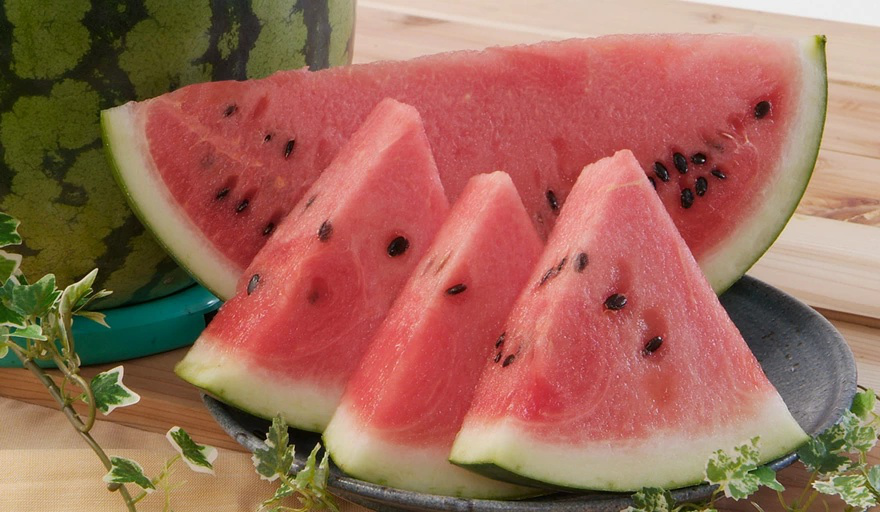

In [ ]:
Image.open(img_path)

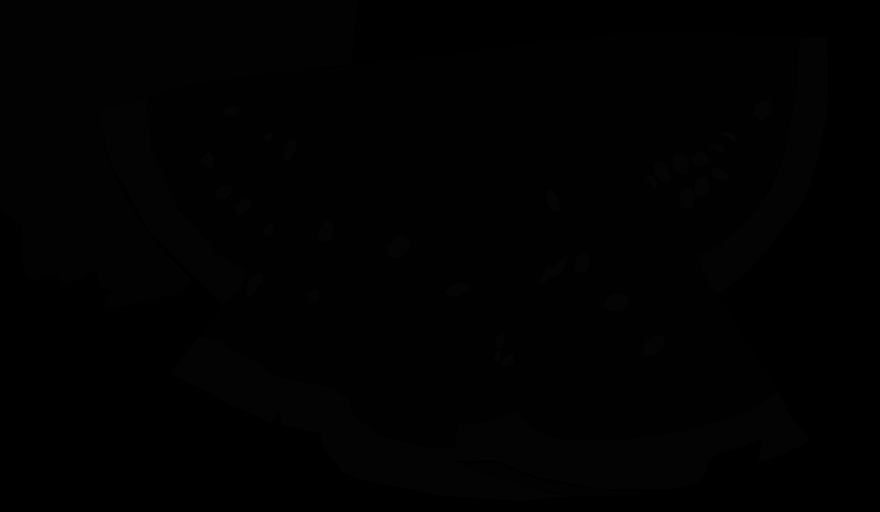

In [ ]:
Image.open(mask_path)

In [ ]:
img = cv2.imread(img_path)
mask = cv2.imread(mask_path)

In [ ]:
img.shape

(512, 880, 3)

In [ ]:
mask.shape

(512, 880, 3)

In [ ]:
# mask 语义分割标注，与原图大小相同
np.unique(mask)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

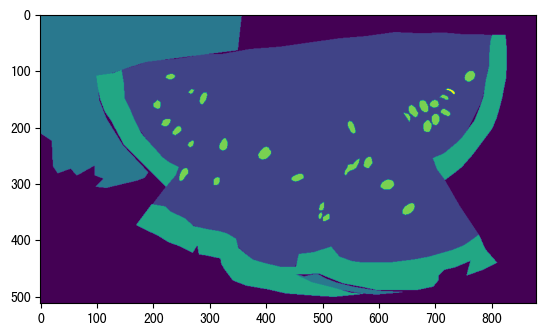

In [ ]:
# 可视化语义分割标注
plt.imshow(mask[:,:,0])
plt.show()

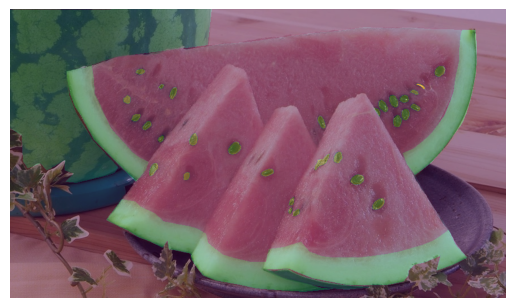

In [ ]:
plt.imshow(img[:,:,::-1]) #Convert to RGB order, reverse the order of the channels
plt.imshow(mask[:,:,0], alpha=0.4) # alpha 高亮区域透明度，越小越接近原图
plt.axis('off')
plt.show()

In [ ]:
# Visualize a series of images
# 指定图像和标注路径
PATH_IMAGE = 'data/Watermelon87_Semantic_Seg_Mask/img_dir/train'
PATH_MASKS = 'data/Watermelon87_Semantic_Seg_Mask/ann_dir/train'
!pwd

/content/drive/MyDrive/workspace/mmsegmentation


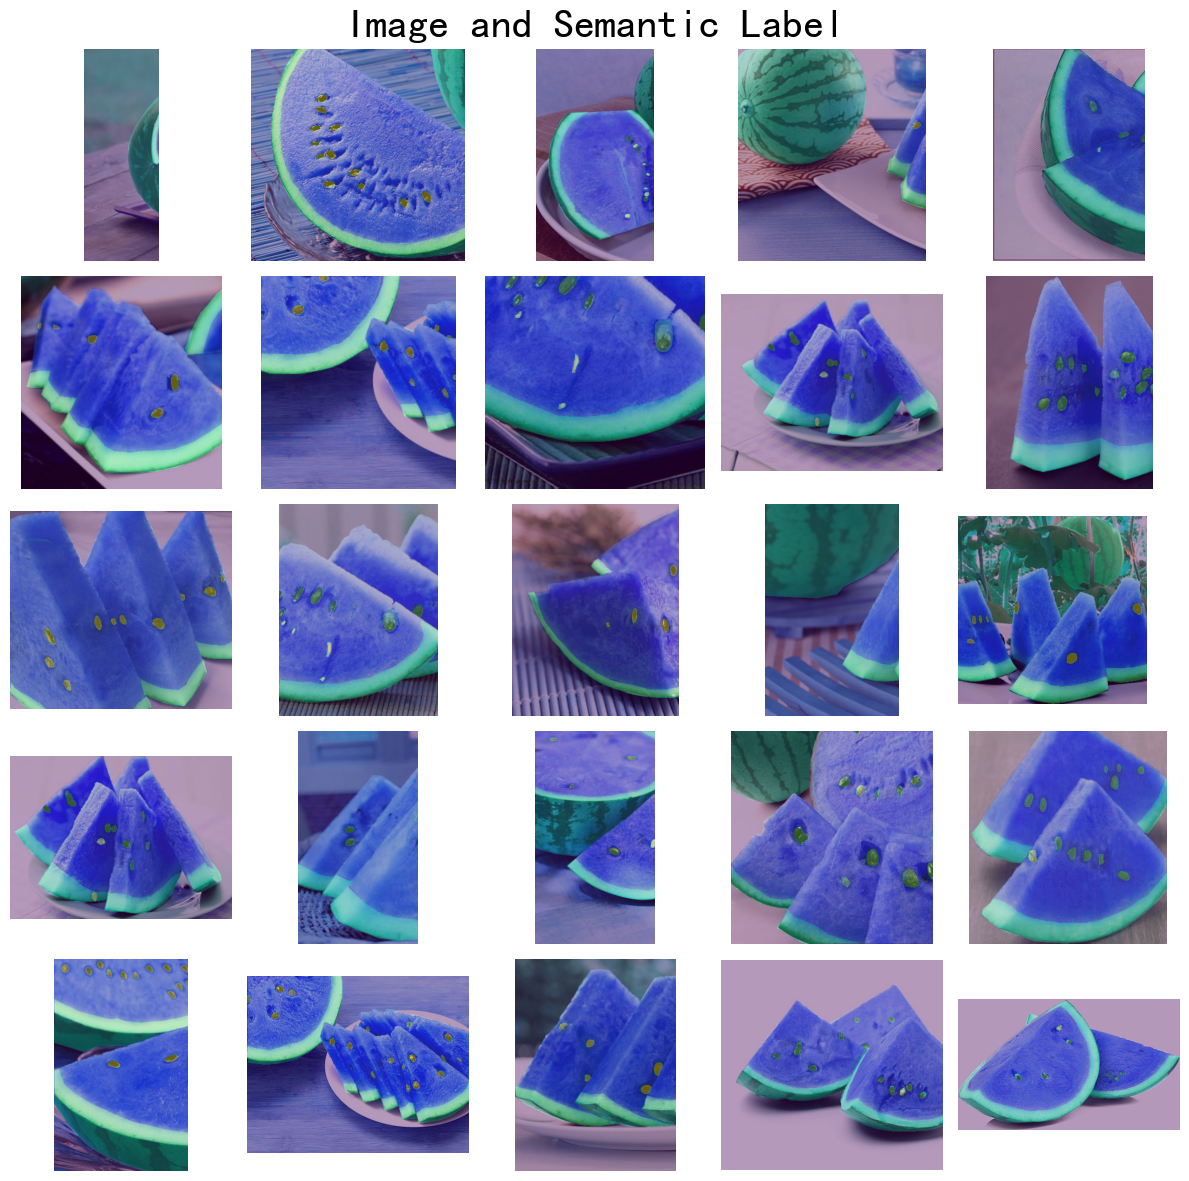

In [ ]:
# n行n列可视化
n = 5

# 标注区域透明度
opacity = 0.4

fig, axes = plt.subplots(nrows=n, ncols=n, sharex=True, figsize=(12,12))

for i, file_name in enumerate(os.listdir(PATH_IMAGE)[:n**2]):

    # 载入图像和标注
    img_path = os.path.join(PATH_IMAGE, file_name)
    mask_path = os.path.join(PATH_MASKS, file_name.split('.')[0]+'.png')
    img = cv2.imread(img_path)
    mask = cv2.imread(mask_path)

    # 可视化
    axes[i//n, i%n].imshow(img)
    axes[i//n, i%n].imshow(mask[:,:,0], alpha=opacity)
    axes[i//n, i%n].axis('off') # 关闭坐标轴显示
fig.suptitle('Image and Semantic Label', fontsize=30)
plt.tight_layout()
plt.show()

# 10. Make the config

In [37]:
os.chdir('/content/drive/MyDrive/workspace/mmsegmentation')
!pwd

/content/drive/MyDrive/workspace/mmsegmentation


In [38]:
import numpy as np
from PIL import Image

import os.path as osp
from tqdm import tqdm

import mmcv
import mmengine
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
# Load the config file
from mmengine import Config
cfg = Config.fromfile('./configs/pspnet/pspnet_r50-d8_4xb2-40k_WatermelonDataset.py')

In [41]:
# Adjust some settings for Dubai dataset
cfg.norm_cfg = dict(type='BN', requires_grad=True) # 只使用GPU时，BN取代SyncBN
cfg.crop_size = (256, 256)
cfg.model.data_preprocessor.size = cfg.crop_size
cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg
cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg
# modify num classes of the model in decode/auxiliary head

# 模型 decode/auxiliary 输出头，指定为类别个数
cfg.model.decode_head.num_classes = 6
cfg.model.auxiliary_head.num_classes = 6

cfg.train_dataloader.batch_size = 8

cfg.test_dataloader = cfg.val_dataloader

# 结果保存目录
cfg.work_dir = './work_dirs/WatermelonDataset'

# 训练迭代次数
cfg.train_cfg.max_iters = 3000
# 评估模型间隔
cfg.train_cfg.val_interval = 400
# 日志记录间隔
cfg.default_hooks.logger.interval = 100
# 模型权重保存间隔
cfg.default_hooks.checkpoint.interval = 1500

# 随机数种子
cfg['randomness'] = dict(seed=0)

In [42]:
# View the full config
print(cfg.pretty_text)

norm_cfg = dict(type='BN', requires_grad=True)
data_preprocessor = dict(
    type='SegDataPreProcessor',
    mean=[123.675, 116.28, 103.53],
    std=[58.395, 57.12, 57.375],
    bgr_to_rgb=True,
    pad_val=0,
    seg_pad_val=255,
    size=(64, 64))
model = dict(
    type='EncoderDecoder',
    data_preprocessor=dict(
        type='SegDataPreProcessor',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375],
        bgr_to_rgb=True,
        pad_val=0,
        seg_pad_val=255,
        size=(256, 256)),
    pretrained='open-mmlab://resnet50_v1c',
    backbone=dict(
        type='ResNetV1c',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        dilations=(1, 1, 2, 4),
        strides=(1, 2, 1, 1),
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=False,
        style='pytorch',
        contract_dilation=True),
    decode_head=dict(
        type='PSPHead',
        in_channels=2048,
        in_index=3,
        channels=51

In [43]:
# Save the configs to file
cfg.dump('pspnet-WatermelonDataset_20230617.py')

# 11. Train the model for segmentation

In [55]:
os.chdir('/content/drive/MyDrive/workspace/mmsegmentation')
!pwd

/content/drive/MyDrive/workspace/mmsegmentation


In [56]:
import numpy as np

import os.path as osp
from tqdm import tqdm

import mmcv
import mmengine

In [57]:
# Import the config file
from mmengine import Config
cfg = Config.fromfile('pspnet-WatermelonDataset_20230617.py')

In [58]:
from mmengine.runner import Runner
from mmseg.utils import register_all_modules

# register all modules in mmseg into the registries
# do not init the default scope here because it will be init in the runner
register_all_modules(init_default_scope=False)
runner = Runner.from_cfg(cfg)

06/17 10:22:48 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Jun  7 2023, 12:45:35) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_

/usr/local/lib/python3.10/dist-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmseg.visualization.local_visualizer.SegLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(
/content/drive/MyDrive/workspace/mmsegmentation/mmseg/models/backbones/resnet.py:431: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '
/content/drive/MyDrive/workspace/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/drive/MyDrive/workspace/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels,

06/17 10:23:00 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
06/17 10:23:00 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

/content/drive/MyDrive/workspace/mmsegmentation/mmseg/engine/hooks/visualization_hook.py:61: UserWarning: The draw is False, it means that the hook for visualization will not take effect. The results will NOT be visualized or stored.
  warnings.warn('The draw is False, it means that the '


In [59]:
# Start training
runner.train()

06/17 10:23:08 - mmengine - WARNING - The prefix is not set in metric class IoUMetric.
06/17 10:23:09 - mmengine - INFO - load model from: open-mmlab://resnet50_v1c
06/17 10:23:09 - mmengine - INFO - Loads checkpoint by openmmlab backend from path: open-mmlab://resnet50_v1c
06/17 10:23:09 - mmengine - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

06/17 10:23:09 - mmengine - WARNING - "FileClient" will be deprecated in future. Please use io functions in https://mmengine.readthedocs.io/en/latest/api/fileio.html#file-io
06/17 10:23:09 - mmengine - INFO - Checkpoints will be saved to /content/drive/MyDrive/workspace/mmsegmentation/work_dirs/WatermelonDataset.
06/17 10:23:13 - mmengine - INFO - Exp name: pspnet-WatermelonDataset_20230617_20230617_102248
06/17 10:23:13 - mmengine - INFO - Iter(train) [   6/3000]  lr: 9.9989e-03  eta: 0:28:20  time: 0.5680  data_time: 0.0168  memory: 3975  loss: 0.1477  decode.loss_ce:

EncoderDecoder(
  (data_preprocessor): SegDataPreProcessor()
  (backbone): ResNetV1c(
    (stem): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): ReLU(inplace=True)
    )
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-0

# 12. Visualize the training log

In [77]:
os.chdir('/content/drive/MyDrive/workspace/mmsegmentation')
!pwd

/content/drive/MyDrive/workspace/mmsegmentation


In [78]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
log_path = 'work_dirs/WatermelonDataset/20230617_100957/vis_data/scalars.json'
with open(log_path, "r") as f:
    json_list = f.readlines()

len(json_list)
eval(json_list[4])

{'lr': 0.009933371122565919,
 'data_time': 0.010654020309448241,
 'loss': 0.055489910021424296,
 'decode.loss_ce': 0.03836915921419859,
 'decode.acc_seg': 75.677490234375,
 'aux.loss_ce': 0.01712075052782893,
 'aux.acc_seg': 81.4666748046875,
 'time': 0.5545087337493897,
 'iter': 300,
 'memory': 3970,
 'step': 300}

In [80]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in json_list[:-1]:
    if 'aAcc' in each:
        df_test = df_test.append(eval(each), ignore_index=True)
    else:
        df_train = df_train.append(eval(each), ignore_index=True)

df_train

<ipython-input-80-efb020c3b4a5>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(eval(each), ignore_index=True)
<ipython-input-80-efb020c3b4a5>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(eval(each), ignore_index=True)
<ipython-input-80-efb020c3b4a5>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(eval(each), ignore_index=True)
<ipython-input-80-efb020c3b4a5>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(eval(each), ignore_index=True)
<ipython-input-80-efb020c3b4a5>:7: FutureWarning: The frame.append method is deprecated 

lr  data_time      loss  decode.loss_ce  decode.acc_seg  \
0   0.009999   0.013148  0.150423        0.106054       29.220581   
1   0.009999   0.016283  0.147683        0.103431       33.239746   
2   0.009978   0.011461  0.067949        0.045345       78.460693   
3   0.009956   0.011643  0.074533        0.052232       72.860718   
4   0.009933   0.010654  0.055490        0.038369       75.677490   
5   0.009911   0.010779  0.066428        0.047224       86.602783   
6   0.009999   0.016819  0.147656        0.103422       35.595703   
7   0.009978   0.015470  0.067688        0.045895       77.737427   
8   0.009956   0.018908  0.071424        0.050077       72.442627   
9   0.009933   0.022586  0.054329        0.038092       78.610229   
10  0.009911   0.026118  0.066384        0.047225       86.734009   
11  0.009889   0.011874  0.053664        0.038259       74.490356   
12  0.009866   0.011433  0.057096        0.040918       80.276489   
13  0.009844   0.019036  0.044970        0.032114       89.422607   
14  0.009822   0.013915  0.041017        0.028432       82.907104   
15  0.009800   0.020171  0.039890        0.028323       86.755371   
16  0.009777   0.029874  0.045075        0.031396       78.463745   
17  0.009755   0.017685  0.035042        0.024282       93.643188   
18  0.009733   0.023561  0.047347        0.032383       84.423828   
19  0.009710   0.011845  0.040992        0.029250       72.912598   
20  0.009688   0.013722  0.043808        0.030778       76.062012   
21  0.009665   0.011460  0.053091        0.037514       72.259521   
22  0.009643   0.014603  0.043651        0.030750       86.111450   
23  0.009621   0.023053  0.043697        0.031134       73.358154   
24  0.009598   0.028996  0.036825        0.025776       89.315796   
25  0.009576   0.016293  0.038670        0.027650       87.683105   
26  0.009554   0.018368  0.035760        0.024891       89.804077   
27  0.009531   0.011151  0.039587        0.027670       80.703735   
28  0.009509   0.013898  0.038395        0.026809       93.493652   
29  0.009486   0.013816  0.038427        0.026964       82.427979   
30  0.009464   0.013956  0.033385        0.023279       86.917114   
31  0.009442   0.021815  0.041407        0.028833       84.484863   
32  0.009419   0.024468  0.041457        0.028779       91.284180   
33  0.009397   0.022202  0.037009        0.026680       83.605957   
34  0.009374   0.011828  0.034022        0.023297       80.352783   
35  0.009352   0.020834  0.043941        0.031494       73.828125   

    aux.loss_ce  aux.acc_seg      time    iter   memory    step  
0      0.044369    20.455933  4.237693     6.0  11478.0     6.0  
1      0.044252    27.148438  0.552111     6.0   3970.0     6.0  
2      0.022604    79.486084  0.569816   100.0   3970.0   100.0  
3      0.022301    71.072388  0.556692   200.0   3970.0   200.0  
4      0.017121    81.466675  0.554509   300.0   3970.0   300.0  
5      0.019204    81.750488  0.556689   400.0   3970.0   400.0  
6      0.044234    27.438354  0.567956     6.0   3975.0     6.0  
7      0.021792    80.755615  0.563994   100.0   3975.0   100.0  
8      0.021347    64.874268  0.579446   200.0   3975.0   200.0  
9      0.016237    82.458496  0.583631   300.0   3975.0   300.0  
10     0.019158    83.264160  0.591275   400.0   3975.0   400.0  
11     0.015406    73.904419  0.557757   500.0  10441.0   500.0  
12     0.016178    80.740356  0.556493   600.0   3975.0   600.0  
13     0.012857    91.091919  0.571243   700.0   3975.0   700.0  
14     0.012584    81.951904  0.560161   800.0   3975.0   800.0  
15     0.011567    85.772705  0.575507   900.0   3975.0   900.0  
16     0.013679    76.116943  0.599689  1000.0   3975.0  1000.0  
17     0.010760    89.773560  0.573372  1100.0   3975.0  1100.0  
18     0.014964    85.848999  0.581839  1200.0   3975.0  1200.0  
19     0.011742    71.716309  0.557492  1300.0   3975.0  1300.0  
20     0.013031    71.932983  0.562577  1400.0   3975.0  1400.0  
21  

In [81]:
df_train.to_csv('训练日志-训练集.csv', index=False)
df_test.to_csv('训练日志-测试集.csv', index=False)

In [82]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg



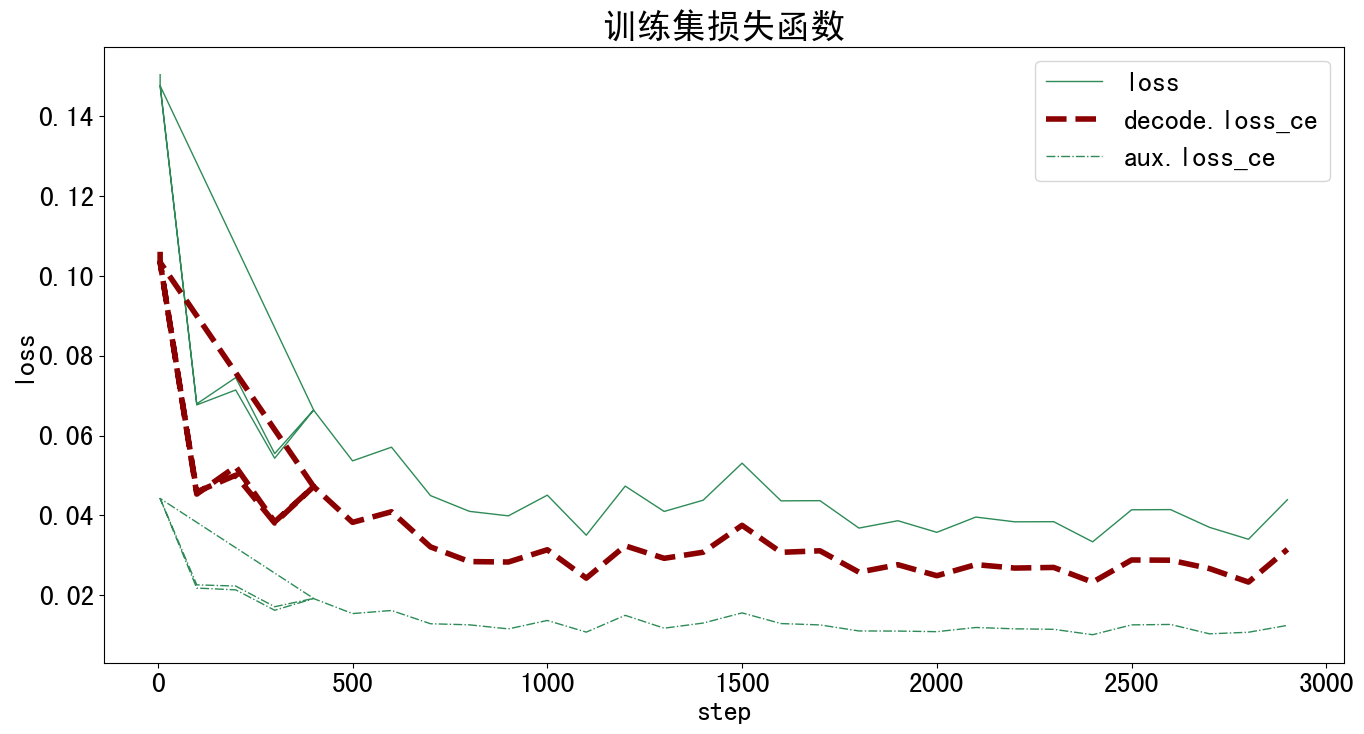

In [83]:
metrics = ['loss', 'decode.loss_ce', 'aux.loss_ce']
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集损失函数', fontsize=25)
plt.savefig('训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()


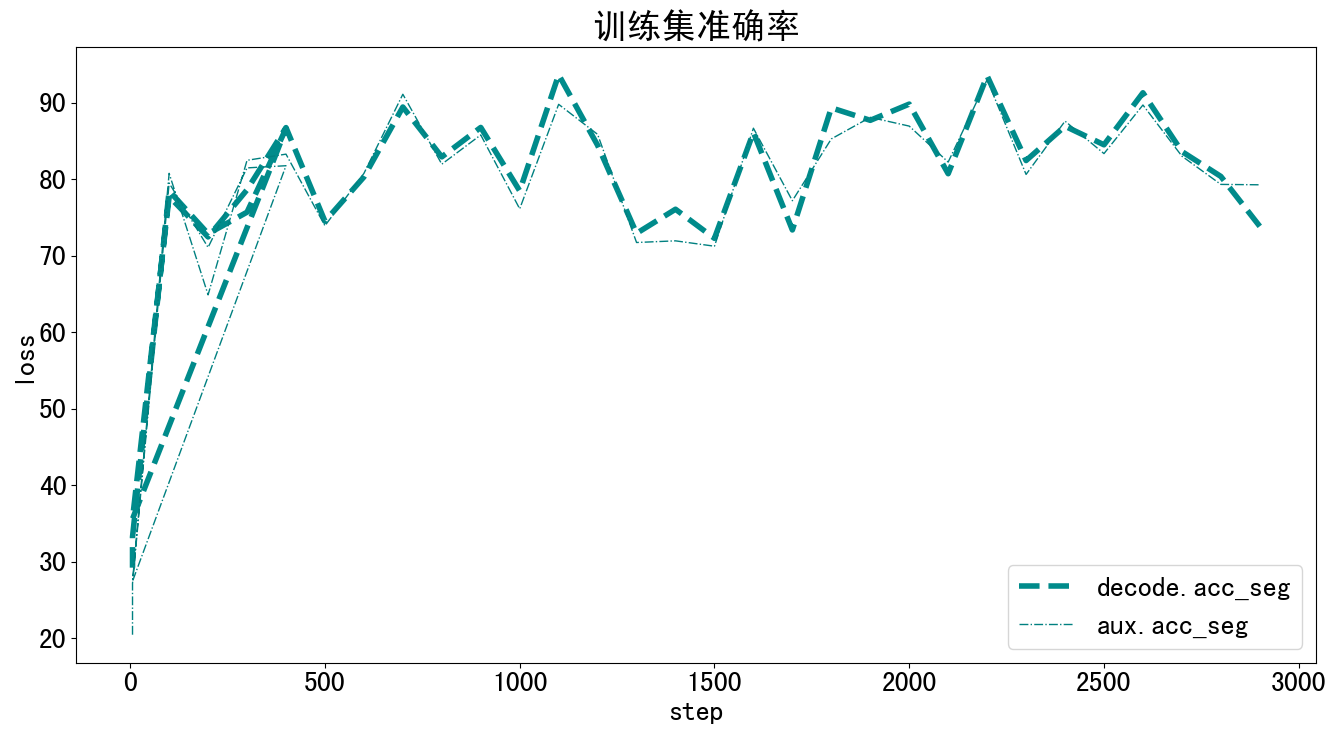

In [84]:
metrics = ['decode.acc_seg', 'aux.acc_seg']
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集准确率', fontsize=25)
plt.savefig('训练集准确率.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

# Visualize the test metrics

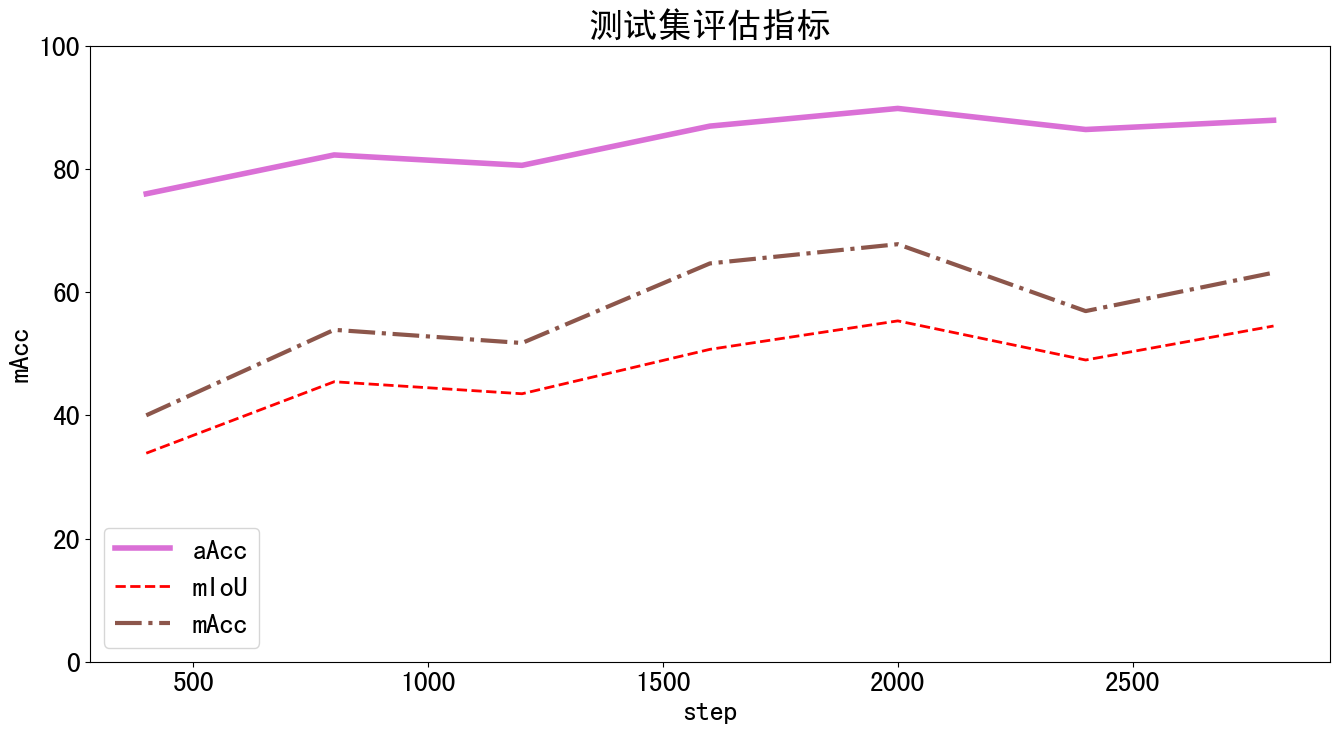

In [85]:
metrics = ['aAcc', 'mIoU', 'mAcc']
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.ylim([0, 100])
plt.xlabel('step', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('测试集评估指标', fontsize=25)
plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

# 13. Test the inference using trained model

In [99]:
os.chdir('/content/drive/MyDrive/workspace/mmsegmentation')
!pwd

/content/drive/MyDrive/workspace/mmsegmentation


In [100]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mmseg.apis import init_model, inference_model, show_result_pyplot
import mmcv
import cv2

In [101]:
# Load the config file
from mmengine import Config
cfg = Config.fromfile('pspnet-WatermelonDataset_20230617.py')

In [102]:
from mmengine.runner import Runner
from mmseg.utils import register_all_modules

# register all modules in mmseg into the registries
# do not init the default scope here because it will be init in the runner

register_all_modules(init_default_scope=False)
runner = Runner.from_cfg(cfg)

06/17 13:11:00 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Jun  7 2023, 12:45:35) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_

/usr/local/lib/python3.10/dist-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmseg.visualization.local_visualizer.SegLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(
/content/drive/MyDrive/workspace/mmsegmentation/mmseg/models/backbones/resnet.py:431: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '
/content/drive/MyDrive/workspace/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/drive/MyDrive/workspace/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels,

06/17 13:11:02 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
06/17 13:11:03 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

/content/drive/MyDrive/workspace/mmsegmentation/mmseg/engine/hooks/visualization_hook.py:61: UserWarning: The draw is False, it means that the hook for visualization will not take effect. The results will NOT be visualized or stored.
  warnings.warn('The draw is False, it means that the '


In [103]:
# Load the model from file
checkpoint_path = './work_dirs/WatermelonDataset/iter_3000.pth'
model = init_model(cfg, checkpoint_path, 'cuda:0')

Loads checkpoint by local backend from path: ./work_dirs/WatermelonDataset/iter_3000.pth


In [151]:
# Load the test image
img = mmcv.imread('data/test_infer_watermelon/watermelon-infer-test3.jpg')
# img = mmcv.imread('data/Watermelon87_Semantic_Seg_Mask/img_dir/val/R.jpeg')

In [152]:
result = inference_model(model, img)
result.keys()
pred_mask = result.pred_sem_seg.data[0].cpu().numpy()
np.unique(pred_mask)

array([0, 1, 2, 3, 4])

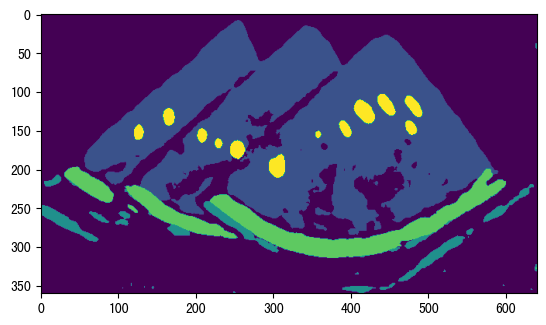

In [153]:
# Show the inerred image
plt.imshow(pred_mask)
plt.show()

In [ ]:
# Visualize the effect of predicted result
visualization = show_result_pyplot(model, img, result, opacity=0.7, out_file='pred.jpg')
plt.imshow(mmcv.bgr2rgb(visualization))
plt.show()

In [127]:
label = mmcv.imread('data/Watermelon87_Semantic_Seg_Mask/ann_dir/val/R.png')
label.shape

(1333, 2000, 3)

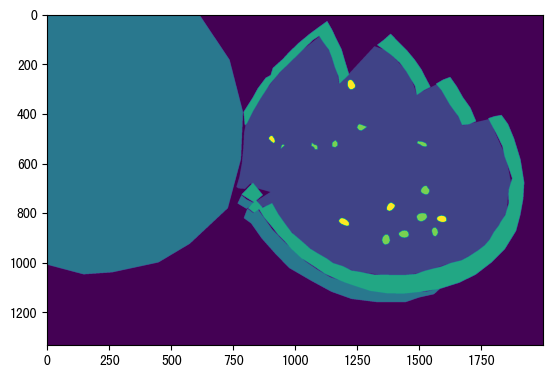

In [128]:
# 三个通道全部一样，只取一个通道作为标注即可。
label_mask = label[:,:,0]
np.unique(label_mask)
plt.imshow(label_mask)
plt.show()


In [130]:
label_mask.shape

(1333, 2000)

In [131]:
pred_mask.shape

(1333, 2000)

In [135]:
TP = (label_mask == 1) & (pred_mask==1)
TN = (label_mask == 0) & (pred_mask==0)
FN = (label_mask == 1) & (pred_mask==0)
FP = (label_mask == 0) & (pred_mask==1)

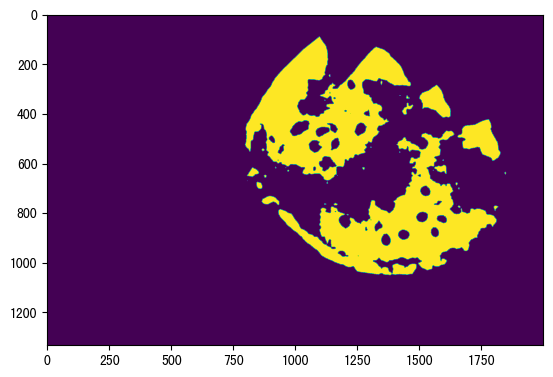

In [136]:
plt.imshow(TP)
plt.show()

In [137]:
confusion_map = TP * 255 + FP * 150 + FN * 80 + TN * 30

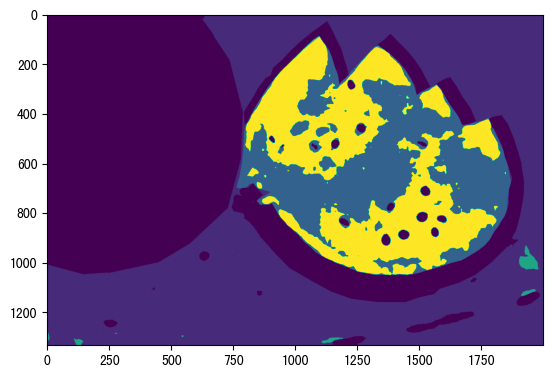

In [138]:
plt.imshow(confusion_map)
plt.show()

In [140]:
from sklearn.metrics import confusion_matrix
confusion_matrix_model = confusion_matrix(label_mask.flatten(), pred_mask.flatten())
confusion_matrix_model

array([[988353,   7301,   7732,  15431,     63,      0],
       [331644, 368733,      0,   2141,   2542,      0],
       [625637,    261, 144619,    254,      0,      0],
       [ 37158,   2576,   2333, 118743,      0,      0],
       [   718,     73,      0,      0,   5841,      0],
       [  2386,   1461,      0,      0,      0,      0]])

In [141]:
import itertools
def cnf_matrix_plotter(cm, classes, cmap=plt.cm.Blues):
    """
    传入混淆矩阵和标签名称列表，绘制混淆矩阵
    """
    plt.figure(figsize=(10, 10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    # plt.colorbar() # 色条
    tick_marks = np.arange(len(classes))

    plt.title('Confusion Matrix', fontsize=30)
    plt.xlabel('Pred', fontsize=25, c='r')
    plt.ylabel('True', fontsize=25, c='r')
    plt.tick_params(labelsize=16) # 设置类别文字大小
    plt.xticks(tick_marks, classes, rotation=90) # 横轴文字旋转
    plt.yticks(tick_marks, classes)

    # 写数字
    threshold = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 fontsize=12)

    plt.tight_layout()

    plt.savefig('混淆矩阵.pdf', dpi=300) # 保存图像
    plt.show()

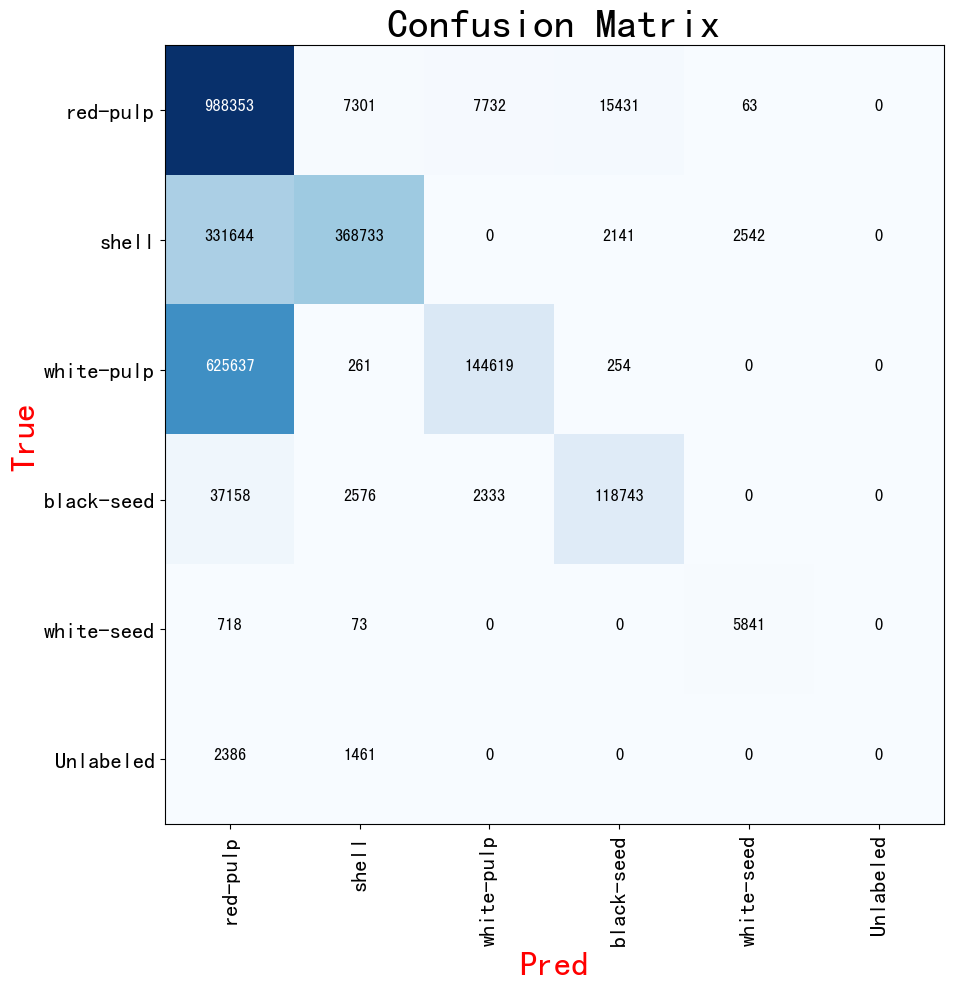

In [142]:
classes = ['red-pulp', 'shell', 'white-pulp', 'black-seed', 'white-seed', 'Unlabeled']
cnf_matrix_plotter(confusion_matrix_model, classes, cmap='Blues')

# 14. Model evaluation on test dataset

In [155]:
os.chdir('/content/drive/MyDrive/workspace/mmsegmentation')
!pwd

/content/drive/MyDrive/workspace/mmsegmentation


In [156]:
!python tools/test.py pspnet-WatermelonDataset_20230617.py work_dirs/WatermelonDataset/iter_3000.pth

06/17 14:04:17 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Jun  7 2023, 12:45:35) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_